<a href="https://colab.research.google.com/github/mroopeshunt/Densho-Digital-Repo-Analysis/blob/main/Topic%20Modelling/Bertopic_TopicModelling_unigrams%26bigrams_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=196af4af0ed5ac3a34d3917b8bfb81514063e1e6d356bcc1b65c9e630e38b468
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 5.2 MB 10.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 3.8 MB 28.2 MB/s 
     |████████████████████████████████| 1.2 MB 56.5 MB/s 
     |████████████████████████████████| 67 kB 876 kB/s 
     |████████████████████████████████| 895 kB 48.3 MB/s 
     |████████████████████████████████| 636 kB 41.5 MB/s 
     |████████████████████████████████| 6.5 MB 42.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330827 sha256=3fea2815ccb00d2fa3e1b11b5f6f1d316c3c5e35293d598c545c65aba63b829b
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

In [ ]:
!pip install sentence_transformers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import json
import os
import glob
import pprint

 
count = 0
answers_dict = {'narr_answers': []}
#path = '/content/gdrive/Narrators Json Files-With Q&A/'
#for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.
for filename in glob.glob('/content/gdrive/My Drive/Narrators Json Files-With Q&A/*.json'):     
    #print(filename)
    narrators_answers_corpus = ""
    with open(filename, mode = 'rb') as currentFile:
        data = json.loads(currentFile.read())
        try:
            if data['transcript'] != {}:
                for segment in data["transcript"].keys():
                    for question in data["transcript"][segment]['Segment Q&A'].keys():
                        narrators_answers_corpus = narrators_answers_corpus + " " + data["transcript"][segment]['Segment Q&A'][question]
                        count = count + 1                
            else:
                pass
        except Exception as e:
            print(e)
            
    answers_dict['narr_answers'].append(narrators_answers_corpus) 

print()

In [ ]:
import pandas as pd
df = pd.DataFrame(answers_dict)
df['narr_answers'] = df['narr_answers'].str.lower()
print(df['narr_answers'].shape)

(1042,)


In [ ]:
df['narr_answers'] = df['narr_answers'].str.replace('[^a-zA-Z0-9 ]', '')

import re
from stop_words import get_stop_words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))

print((set(list(STOPWORDS)) | set(list(stop_words))))
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
print(type(list(STOPWORDS)))
print(type((stop_words)))
stopwords.extend(['oh', 'yeah','like', 'came', 'back', 'go', 'know', 'said', 'went', 'us', 'think', 'one', 'yes', 'years', 'old', 'little', 'bit', 'uhhuh', 'everything', 'else', 'two', 
                  'three','kind', 'thing', 'remember', 'get', 'kind', 'thing', 'take', 'say', 'really', 'want', 'make', 'use', 'come', 'gonna', 'jpn', 'japanese', 'american', 'huh', 
                  'within', 'mi', 'blah', 'goddamn', 'hata', 'oclock', 'basically', 'dee', 'mp', 'fresno', 'anymore', 'topaz', 'mama', 'yah', 'til', 'toru', 'two', 'four', 'five', 'six', 
                  'seven', 'eight', 'nine', 'eng', 'particular', 'min', 'certainly', 'rather', 'twelve'])
print(len(stopwords))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
df['clean_narr_answers'] = df['narr_answers'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'its', 'up', 't', 'having', 's', "that'll", "didn't", 'a', 'until', 'more', 'not', "shouldn't", 'when', 'whom', 'again', 'after', 'wouldn', 'been', 'the', 'below', 'don', 'can', "we'd", 'into', "i've", 'themselves', 'so', "you're", 'now', "she'd", "who's", "here's", "why's", 'once', 'he', 'him', 'that', 'couldn', 'mightn', 'which', 'his', 'they', 'them', "wouldn't", "how's", 'haven', 'theirs', 'o', 'could', "they'll", 'have', 'to', 'why', 'there', "you'll", 'down', 'same', 'were', 'any', "couldn't", 'how', 'nor', "when's", 'who', 'during', 'ours', 'should', 'some', 'these', 'while', "let's", 'through', 're', 'what', "it's", 'if', "we've", 'here', "you'd", 'own', 'both', 'didn', "hadn't", 'this', 'being', 'cannot', "they've", "they're", "mustn't", 'because', 'about', 'all', 'hers', 'she', "he's", 'aren', 'are', 'of', "hasn't", 'has', "needn't", "we're", 'weren', 'me', 'further

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

df['verblem_narr_answers'] = df['clean_narr_answers'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="v") for word in row.split()))
df['nounlem_narr_answers'] = df['verblem_narr_answers'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="n") for word in row.split()))
df['adjlem_narr_answers'] = df['nounlem_narr_answers'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="a") for word in row.split()))
df['advlem_narr_answers'] = df['adjlem_narr_answers'].apply(lambda row: " ".join(wordnet_lemmatizer.lemmatize(word, pos="r") for word in row.split()))

df['advlem_narr_answers'] = df['advlem_narr_answers'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:

import nltk
nltk.download('punkt') 
allWords = nltk.tokenize.word_tokenize(" ".join(i for i in df['advlem_narr_answers'].values))
allWordDist = nltk.FreqDist(w.lower() for w in allWords) 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
common_words_from_answers = {}
for common_word in list(allWordDist):
    #print(common_word, allWordDist[common_word])
    common_words_from_answers[common_word] = allWordDist[common_word]

In [ ]:
common_words_sorted = dict(sorted(common_words_from_answers.items(), key=lambda item: item[1], reverse = True))

In [ ]:
print(len(stopwords))
df['advlem_narr_answers'] = df['advlem_narr_answers'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

734


In [ ]:
print(len(list(df['advlem_narr_answers'])))
doc = []
for i in list(df['advlem_narr_answers']):
  if i != "":
    doc.append(i)

print(len(doc))

1042
945


In [ ]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(doc, show_progress_bar=True)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(doc, embeddings)

2022-03-16 04:30:12,291 - BERTopic - Reduced dimensionality with UMAP
2022-03-16 04:30:12,379 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
freq = topic_model.get_topic_info(); 
freq

,Topic,Count,Name
0,-1,420,-1_garden_york_art_tree
1,0,120,0_temple_minister_christian_sing
2,1,102,1_bainbridge_tree_scout_horse
3,2,82,2_redress_court_civil_commission
4,3,36,3_sacramento_clarksburg_berkeley_florin
5,4,31,4_jail_national_position_district
6,5,29,5_spokane_bellevue_railroad_hood
7,6,29,6_oregon_hood_minidoka_assembly
8,7,26,7_prisoner_intelligence_colonel_savage
9,8,25,8_fukuoka_paint_alameda_garden


In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('temple', 0.01053954099745967),
 ('minister', 0.009376153012569194),
 ('christian', 0.008056313768585534),
 ('sing', 0.007381101719804666),
 ('grandmother', 0.007263792147995888),
 ('music', 0.006185705006685562),
 ('village', 0.005577477338608709),
 ('hiroshima', 0.005556301901678002),
 ('attend', 0.005464486697278935),
 ('cousin', 0.005213878394863378)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,3)
topic_model.visualize_distribution(probs[300], min_probability=0.000, width = 700, height = 700)
#plt.show()

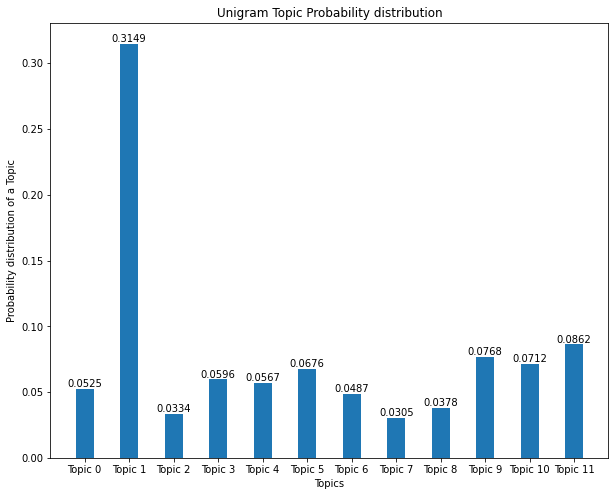

In [ ]:
uni_prob = [0.05250036, 0.3148951, 0.03335747, 0.05960398, 0.05673108, 0.06757632, 0.0486642, 0.03048551, 0.03776471, 0.07683757, 0.07121367, 0.08619956]
uni_topics = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']
unigram_prob = pd.DataFrame({'Topics': uni_topics, 'Probability': uni_prob})
#bigram_prob

fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(unigram_prob['Topics'], unigram_prob['Probability'],
        width = 0.4)

for i in range(len(unigram_prob['Probability'])):
    plt.annotate(round(unigram_prob['Probability'][i], 4), xy=(unigram_prob['Topics'][i],unigram_prob['Probability'][i]), ha='center', va='bottom')

plt.xlabel("Topics")
plt.ylabel("Probability distribution of a Topic")
plt.title("Unigram Topic Probability distribution")
plt.show()

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=12)

In [ ]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 300, height = 300)

In [ ]:
 topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
#help(BERTopic)

In [ ]:
#topic_model.update_topics(doc, topics, n_gram_range=(2, 2))
from bertopic import BERTopic

bigram_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
bigram_topics, bigram_probs = bigram_topic_model.fit_transform(doc, embeddings)

2022-03-16 04:37:39,419 - BERTopic - Reduced dimensionality with UMAP
2022-03-16 04:37:39,502 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
bigram_freq = bigram_topic_model.get_topic_info() 
bigram_freq

,Topic,Count,Name
0,-1,417,-1_barb wire_sugar beet_december 7th_ice cream
1,0,123,0_boyle height_twin fall_temple temple_barb wire
2,1,73,1_supreme court_redress movement_civil liberty...
3,2,68,2_sugar beet_boyle height_roller skate_narr note
4,3,43,3_korean vet_beg pardon_barb wire_ed note
5,4,42,4_fruit vegetable_lewis clark_columbia bouleva...
6,5,35,5_walnut grove_sacramento sacramento_sugar bee...
7,6,28,6_fort lupton_st paul_yakima valley_sugar beet
8,7,28,7_john aiso_interrogate prisoner_fort snelling...
9,8,26,8_et cetera_boyle height_transfer bismarck_el ...


In [ ]:
bigram_topic_model.visualize_topics()

In [ ]:
bigram_topic_model.visualize_distribution(bigram_probs[300], min_probability=0.000)

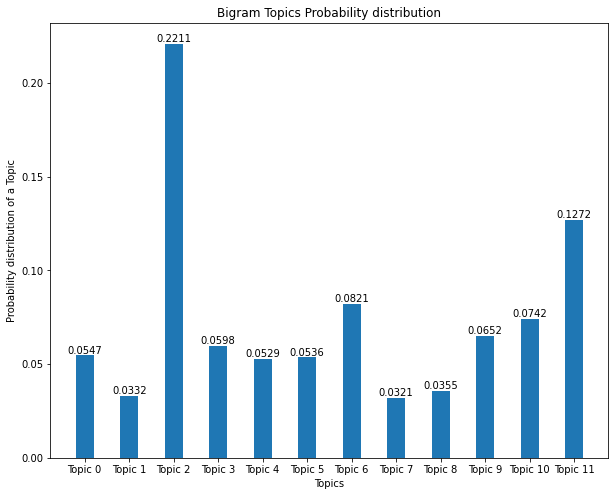

In [ ]:
import matplotlib.pyplot as plt

bi_prob = [0.05467689, 0.03323768, 0.2210927, 0.05982652, 0.05286878, 0.05362069, 0.08213767, 0.03209359, 0.0355486, 0.06521767, 0.07422488, 0.1271738]
bi_topics = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']
bigram_prob = pd.DataFrame({'Topics': bi_topics, 'Probability': bi_prob})
#bigram_prob

fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(bigram_prob['Topics'], bigram_prob['Probability'],
        width = 0.4)

for i in range(len(bigram_prob['Probability'])):
    plt.annotate(round(bigram_prob['Probability'][i], 4), xy=(bigram_prob['Topics'][i],bigram_prob['Probability'][i]), ha='center', va='bottom')
plt.xlabel("Topics")
plt.ylabel("Probability distribution of a Topic")
plt.title("Bigram Topics Probability distribution")
plt.show()

In [ ]:
bigram_topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

In [ ]:
bigram_topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [ ]:
bigram_topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

In [ ]:
bigram_topic_model.visualize_term_rank()